# NRK Intervjuoppgave Data Scientist: Emiliano Guevara

emiguevara@gmail.com

## Explanation of this notebook

This page shows the code and results for the interview task as an Ipython Notebook.

Ipython notebook is a rather popular framework that allows to sketch research notes and code at the same time. The notebook can be visualized with the embedded results and graphics as a common webpage, or it can be downloaded and executed interactively in a local machine.

In order to run correctly, the following packages must be installed (written and tested on Linux Fedora 23, the package names may change on a different operating system):

* gcc gcc-c++ (devel packages)
* python 2.7

#### Python libraries

* numpy scipy python-matplotlib python-ipython python-pandas (standard python scientific environment)

#### Running this notebook

Once the needed packages are correctly installed, this Ipython Notebook can be used interactively by checking out the source file and running:

* ipython notebook

A browser window will open at http://localhost:8888/ and the notebook will be available as "Unge_lovende.ipynb".
 
More information on how to run notebooks is available at http://ipython.org/notebook.html


## Analysis

In what follows I sketch a simple exploratory analysis of the provided dataset. Due to time limitations, I could only dedicate a few hours to this task and I therefore did not try any advanced analysis or modelling of the data. Similarly, I did not manipulate the format of the dataset beyond some simple data-type parsing.

I limited myself to using only one statistical/modelling library, Python Pandas http://pandas.pydata.org/.

Besides the basic exploratory figures, I also point out some clear problems arising from the very nature of the data and the methods used to collect them.


### 1. Import statements and preliminary commands

In [2]:
# reading and parsing csv files  
import csv
# using urls
import urllib2
# analysis
import matplotlib
import pandas as pd
# date parsing
from datetime import datetime
# Enable inline plotting and configure plotting
%matplotlib inline
matplotlib.pylab.rcParams['figure.figsize'] = (10, 6)
matplotlib.style.use('ggplot')


### 2. Getting the dataset and viewing entries

In [3]:
url = 'https://storage.googleapis.com/nrk-data/unge-lovende.csv'
# or use local file
# url = '/path/to/dataset'

In [4]:
# read data into dataframe, including column headers
df = pd.read_csv(url, header=0)
# print out first entries
df.head()

,userId,programId,visitStartTime,timeWithinVisit
0,2172883450372358834,KMTE20000514,1447617021,1614261
1,2214426530139075244,KMTE20000314,1447578419,1782834
2,3261020776373483236,KMTE20000114,1447180923,206935
3,3300130967635711526,KMTE20000114,1447139006,1630400
4,3303148955234989541,KMTE20000614,1447186150,4274932


### 3. Normalization and regularization, data types

In [5]:
# show that data are importad as a pandas dataFrame
print type(df)

<class 'pandas.core.frame.DataFrame'>


In [6]:
# check data types in frame
df.dtypes

userId              int64
programId          object
visitStartTime      int64
timeWithinVisit     int64
dtype: object

In [7]:
# userId and programId are categorical variables
df['userId'] = df['userId'].astype('category')
df['programId'] = df['programId'].astype('category')

# parse timestamps
df['visitStartTime'] = pd.to_datetime(df['visitStartTime'], unit='s')

# normalize timeWithinVisits from milliseconds to seconds
normalize = lambda x: x / 1000
df['timeWithinVisit'] = df['timeWithinVisit'].apply(normalize)

In [8]:
# visualize our first entries
df.head()

,userId,programId,visitStartTime,timeWithinVisit
0,2172883450372358834,KMTE20000514,2015-11-15 19:50:21,1614
1,2214426530139075244,KMTE20000314,2015-11-15 09:06:59,1782
2,3261020776373483236,KMTE20000114,2015-11-10 18:42:03,206
3,3300130967635711526,KMTE20000114,2015-11-10 07:03:26,1630
4,3303148955234989541,KMTE20000614,2015-11-10 20:09:10,4274


In [9]:
# final data types in frame
df.dtypes

userId                   category
programId                category
visitStartTime     datetime64[ns]
timeWithinVisit             int64
dtype: object

### 4. Summary statistics

In [10]:
# basic descriptive statistics, also for categorical columns
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589774 entries, 0 to 589773
Data columns (total 4 columns):
userId             589774 non-null category
programId          589774 non-null category
visitStartTime     589774 non-null datetime64[ns]
timeWithinVisit    589774 non-null int64
dtypes: category(2), datetime64[ns](1), int64(1)
memory usage: 17.4 MB


,userId,programId,visitStartTime,timeWithinVisit
count,5.897740e+05,589774,589774,589774.000000
unique,1.483750e+05,6,264922,NaN
top,3.252011e+17,KMTE20000114,2015-11-21 23:05:24,NaN
freq,2.400000e+02,117484,26,NaN
first,NaN,NaN,2015-11-06 10:43:16,NaN
last,NaN,NaN,2015-12-20 02:11:21,NaN
mean,NaN,NaN,NaN,3326.544799
std,NaN,NaN,NaN,2749.883809
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,1616.000000


In [11]:
# difference max - min timestamps as datetime delta:
(df['visitStartTime'].max() - df['visitStartTime'].min())

Timedelta('43 days 15:28:05')

#### Comments

The summary statistics above shows that the provided dataset consists of **589774** data points (5.897740e+05 in scientific notation in column **userId**) for **148375** unique users in Google Anaytics (1.483750e+05). The top number of entries for a single user in the dataset is **240** (2.400000e+02).

The column **programId** has only **6** unique values (six different broadcast episodes); the top episode is **KMTE20000114** (episode 1), viewed a total of **117484** times.

The column **visitStartTime** shows that the dataset is spread over a period of six weeks (**43** days) between November and December 2015.

Finally, the column **timeWithinVisit**, being the only dimension consisting of numerical variables, can be summarized with the standard measures of dispersion and distribution. The mean length of visits is **3326.5** seconds (about 55 minutes), ranging from a minimum of **0** to a maximum of **32588** seconds (over 543 minutes).

#### Observations

In order to draw final conclusions, a deeper exploration of the dataset is mandatory. We can, however, already draw some preliminary conclusions:

* first of all, the dataset is very noisy and granular (it contains a large number of unique users that have not watched the whole series)

* second, the way data are collected for **visitStartTime** is sub-optimal: given how wide-spread the values for this column are (as witnessed by the large standard deviation **std**), and given that the episodes published online last between 29 and 30 minutes, it is difficult to trust the significance of a mean visit of 55 minutes. The expected duration of a visit lies somewhere between the 25% and 50% percentiles, and calls for a different methodology to register viewing times.




### 5. Exploring unique viewers of Unge Lovende

As described above, this dataset has a large number of unique users. Let us see how they are distributed.

First, we generate a visit count for each user with the pandas method *.value_counts()*.

In [12]:
# simple frequency count of visits per user
# df['userId'].value_counts()

# combined frequency of frequencies per user (frequency bands)
df['userId'].value_counts().value_counts(sort=False)

1      37251
2      17468
3      11104
4      10141
5      12571
6      50685
7       5273
8       1411
9        687
10       462
11       362
12       529
13       129
14        78
15        54
16        39
17        21
18        29
19        16
20        10
21         7
22         5
23         4
24        10
25         3
26         5
27         2
28         1
29         1
33         3
34         1
35         2
37         1
38         1
39         1
40         3
48         2
60         1
90         1
240        1
dtype: int64

From the frequncy band count above we can infer that user visits are a very skewed population. This is shown clearly by plotting a histogram of the distribution below, where we can see two distinct peaks: unique users that visited only **1** video and those who visited **6** videos.

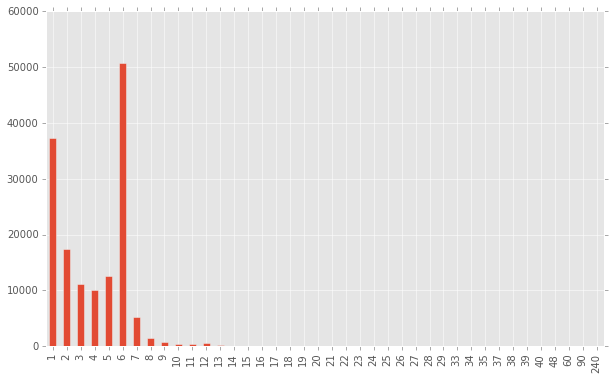

In [13]:
# histogram of frequency bandst
df['userId'].value_counts().value_counts(sort=False).plot(kind='bar')

# other plots for column userId, simple frequency counts

# df['userId'].value_counts().plot(kind='line')
# df['userId'].value_counts().plot(kind='kde')

# box plot of simple frequency distribution
# df['userId'].value_counts().plot(kind='box', vert=False, showmeans=True, meanline=True, title='Number of visits per userId')

# box plot of simple frequency distribution, cutoff at freq max 10 for easier viewing
# df['userId'].value_counts()[df['userId'].value_counts() < 11].plot(kind='box', vert=False, showmeans=True, meanline=True, title='Number of visits per userId (cut at max 10)')

#### Observations

If we remind that the total number of unique visitors in the dataset is **148375**, we can safely draw a few observations.

* Of the total of unique users, about **1/3** watched only one episode and never came back, while the remaining **2/3** continued watching Unge Lovende
* Only about **1/3** of the total unique users watched the maximum expected number (six episodes) in the series
* The population has a very long queue of outliers that apparently visited Unge Lovende more than **6** times (and up to **240** times): these cases are most probably due to connection problems, but they do not seem to be highly significant in the dataset

A critical observation is in order: the present dataset is based on Google Analytics cookies and does not exclude cases in which a single physical user may watch two or more episodes on different devices (mobile, iPad, laptop, home and work networks, etc.). As such, and unless the portal personalization and analytics are perfectly synced, **there is no way to ensure the quality of these observations**.

As a last remark, it would be extremely interesting to model unique visitors at the time of their first visit to a TV program in order to see if it is possible to predict their future attachment to the series (wether they will watch only one or all episodes).

### 6. Exploring unique episodes of Unge Lovende

First, we generate a view count for each episode with *.value_counts()*. We then plot the results as a horizontal bar chart.

In [14]:
df['programId'].value_counts()

# summary statistics not significant in this flat distribution
# df['programId'].value_counts().describe()

KMTE20000114    117484
KMTE20000214    100022
KMTE20000314     94600
KMTE20000414     93168
KMTE20000514     92480
KMTE20000614     92020
dtype: int64

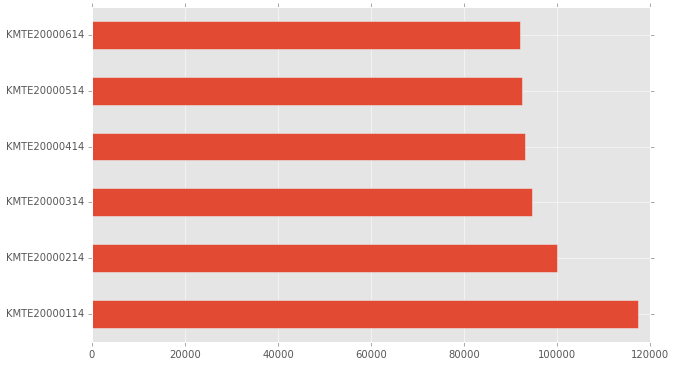

In [15]:
# horizontal bar chart
df['programId'].value_counts().plot(kind='barh')

#### Observations

The column **programId** in the provided dataset has an extremely flat distribution. The six different episodes of Unge Lovende present in this dataset have very similar frequencies.

Unsurprisingly, the first two episodes (**KMTE20000114** and **KMTE20000214**) attracted a larger number of visits, but from episode 3 onwards, the number of visits remains almost constant between **92000** and **94000**.

Trying draw a relation between these data and the the observations I made in the previous section, it comes as a surprise that each episode has been watched such high number of times: the unique visitors that watched six episodes was roughly about **50000**, **1/3** of the total, and I would not expect the last episodes to have a total number of views that is almost twice that figure.

In order to clarify these issues, a much deeper analysis is necessary. I would like to stress that the methodology used to collect the raw variables is far from satisfactory.

### 7. Exploring duration of visits to Unge Lovende (*timeWithinVisit* in seconds)

As I pointed out above, since this column contains numerical variables, generating a summary statistics for it straightforward.

The statistical distribution of this column immediately shows unexpected features: it ranges from a minimum of **0** to a maximum of **32588** seconds (over 543 minutes), and the mean length of visits is **3326.5** seconds (about 55 minutes).

Given that the episodes published online last between 29 and 30 minutes (about **1800** seconds), it is very surprising that the mean visit for an episode is almost twice the length of an episode. Either online TV audiences are very keen on interrupting the program while they are watching it, or the methodology to collect these times has some flaws.

The distribution of the visit times is nicely visualised with a boxplot (shown below with a cutoff max value of 10000 seconds for better viewing).

In [16]:
df['timeWithinVisit'].describe()

count    589774.000000
mean       3326.544799
std        2749.883809
min           0.000000
25%        1616.000000
50%        2387.000000
75%        4568.000000
max       32588.000000
Name: timeWithinVisit, dtype: float64

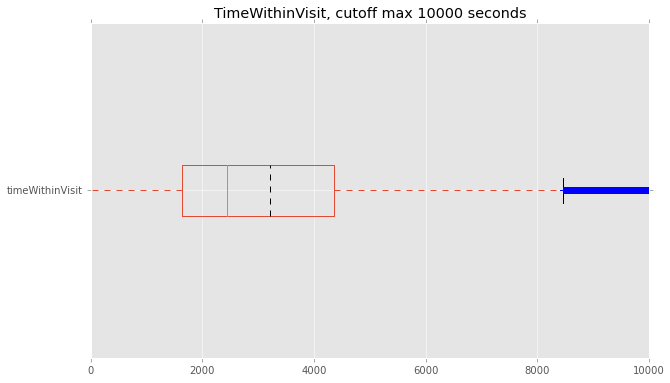

In [17]:
# boxplot of the whole distribution, cutoff to max 10000 seconds: dashed line is value of mean
df[(df['timeWithinVisit']>0) & (df['timeWithinVisit']<10000)]['timeWithinVisit'].plot(kind='box', vert=False, showmeans=True, meanline=True, title='TimeWithinVisit, cutoff max 10000 seconds')

# boxplot of the whole distribution, with a long queue of outliers
# df['timeWithinVisit'].plot(kind='box', vert=False, showmeans=True, meanline=True, title='TimeWithinVisit')

# other plots: density plot
# df['timeWithinVisit'].plot(kind='kde')
# other plots: histogram
# df['timeWithinVisit'].plot(kind='hist')

### 8. Exploring binge watching of Unge Lovende

In order to describe the relation between this dataset and binge watching, we need an operational model of *binge*. For the purpose of this task, I propose to define *binge* as the difference in time between the first and the last **visitStartTime** for each unique user. Furthermore, I propose to imagine that a ideal *binge-watcher* will watch all the available episodes in a vary short time: in other terms, a binge-watcher of Unge Lovende will consume all six episodes in just a few hours, maximum one day.

To obtain this model, we need to manipulate the original dataframe; we read the original data once more and extract a vector with unique users.

In [18]:
# read data into dataframe, including column headers
df2 = pd.read_csv(url, header=0)
# extract all unique userIds
unique_user_ids = pd.unique(df2.userId.ravel())

Now we need to loop the original dataset for each unique **userId**, extracting all of his/her **visitStartTime** values and keeping track of the first and last visits. Since the original dataset has Unix timestamps, a simple min() and max() integer comparison will extract the correct values.

On each iteration, we append the extracted data to an array.

This loop could take a few minutes to compute.

In [19]:
# binge container
binge = []

# loop, not optimal but not too bad either
for uniq in unique_user_ids:
    selected = df2[df2['userId']==uniq]['visitStartTime']
    # save extracted data with dimension variable names
    to_save = {
        'userId': uniq,
        'countVisits': len(selected),
        'firstVisit': min(selected),
        'lastVisit': max(selected),
        'diff': max(selected) - min(selected)
    }
    # append to container
    binge.append(to_save)


Next we need to create a pandas dataFrame with the extracted data for analysis and visualization.

In [20]:
# create binge dataFrame
df3 = pd.DataFrame(binge)
# show our first entries
df3.head()

,countVisits,diff,firstVisit,lastVisit,userId
0,2,0,1447617021,1447617021,2172883450372358834
1,4,0,1447578419,1447578419,2214426530139075244
2,7,10954,1447169969,1447180923,3261020776373483236
3,1,0,1447139006,1447139006,3300130967635711526
4,6,175134,1447011016,1447186150,3303148955234989541


We are ready to compute summary statistics for the binge dataframe. The crucial variable is represented in the **diff** column, expressed as seconds elapsed between first and last visit for each of the **148375** unique **userIds**.

In [21]:
df3['diff'].describe()

count     148375.000000
mean      156526.496438
std       352762.753980
min            0.000000
25%            0.000000
50%         6231.000000
75%       101382.500000
max      2802812.000000
Name: diff, dtype: float64

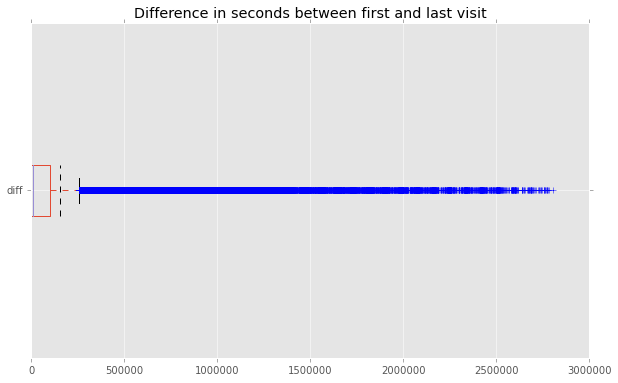

In [22]:
# boxplot difference in seconds
df3['diff'].plot(kind='box', vert=False, showmeans=True, meanline=True, title='Difference in seconds between first and last visit')


We can clearly see that this first trial shows a very sparse population. The mean difference between first and last visit is **156526** seconds (about **43.5** hours), a value that is well beyond the 75% percentile.

The boxplot visualization above also shows a strongly left-skewed distribution with a very long right-tail of values over the mean.

In order to minimize the noise and sparseness of the data, I will filter the new dataframe to unique **userIds** that have exactly **6** **countVisits** (the maximum expected number of episodes that a well-behaved user should see).

In [23]:
df3[(df3['countVisits']==6)]['diff'].describe()

count      50685.000000
mean      177729.449285
std       322693.281711
min            0.000000
25%         7720.000000
50%        59253.000000
75%       174265.000000
max      2767148.000000
Name: diff, dtype: float64

 Furthermore, I will filter the data set to a maximum **diff** value of **86400** seconds (**24** hours), a reasonable time for users who compulsively consume TV programs in a short period of time.

In [24]:
df3[(df3['countVisits']==6) & (df3['diff']<86400)]['diff'].describe()

count    30924.000000
mean     23661.315063
std      28223.137312
min          0.000000
25%          0.000000
50%      10899.500000
75%      41118.750000
max      86396.000000
Name: diff, dtype: float64

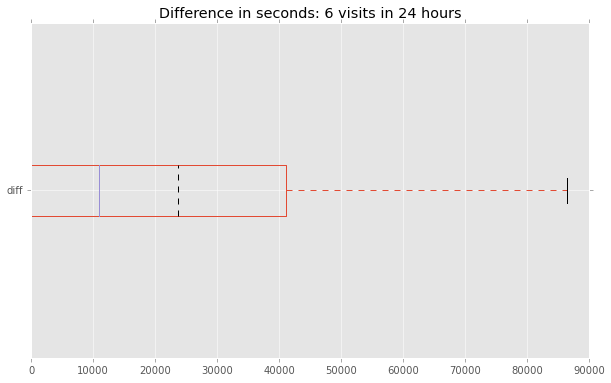

In [25]:
# boxplot difference in seconds limited to 6 visits/episodes and max 24 hours
df3[(df3['countVisits']==6) & (df3['diff']<86400)]['diff'].plot(kind='box', vert=False, showmeans=True, meanline=True, title='Difference in seconds: 6 visits in 24 hours')


#### Observations

Besides the evident noisiness of the data at stake, it is possible to extract very clear indications regarding binge-watching of Unge Lovende.

As we pointed out in previous sections, about **1/3** of all unique **userIds** watched **6** episodes of Unge Lovende (**50685** out of **148375**).

Of these loyal users, a significant majority, **30924** out of **50685** (**61%**), watched all six episodes within the span of **24** hours.

The number of ideal *binge-watchers* as defined in this task, **30924**, represents over **20%** of the total number of unique **userIds** (**148375**) logged in the provided dataset.

In my opinion, the message to take home is that making all episodes available online at the same time encourages binge-watching and capitalizes a vast majority of the viewers that will consume all the published videos.

While not adressing a number of issues and complications such as the possibility of multiple binges per user, the working hypotheses and tentative definitions proposed in this section proved to be efficient in capturing a general tendency to favor binge-watching in the provided dataset.